In [1]:
!pip install librosa

    100% |████████████████████████████████| 1.6MB 494kB/s ta 0:00:011
    100% |████████████████████████████████| 276kB 5.9MB/s eta 0:00:01
    100% |████████████████████████████████| 327kB 4.9MB/s eta 0:00:01
    100% |████████████████████████████████| 3.2MB 495kB/s ta 0:00:011
    100% |████████████████████████████████| 16.8MB 96kB/s  eta 0:00:01    75% |████████████████████████▎       | 12.8MB 12.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for librosa ... done
  Stored in directory: /root/.cache/pip/wheels/18/b8/10/f0f8f6ac60668a5cd75596cf14c25bb6b3ea1ecd815f058b7e
  Running setup.py bdist_wheel for audioread ... done
  Stored in directory: /root/.cache/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... done
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy
You are using pip version 9.0.1, however version 18.1 i

In [2]:
import pickle
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Step 0

Loading and evaluation of the dataset

In [3]:
raw_wave_pickle = open("raw_wave_training_frames.pickle","rb")
raw_wave_training_frames = pickle.load(raw_wave_pickle)

raw_wave_pickle = open("raw_wave_validation_frames.pickle","rb")
raw_wave_validatino_frames = pickle.load(raw_wave_pickle)

print(len(raw_wave_training_frames))
print(len(raw_wave_validatino_frames))

948
130


In [4]:
sam = raw_wave_training_frames[0]
sam.shape

(638, 400)

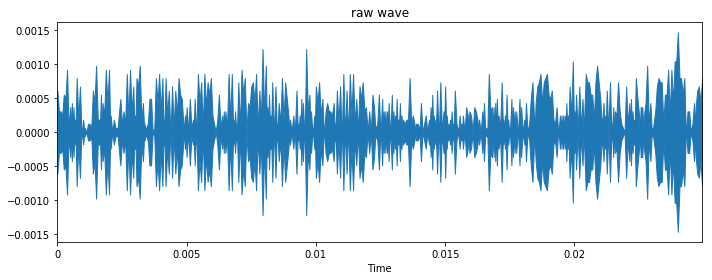

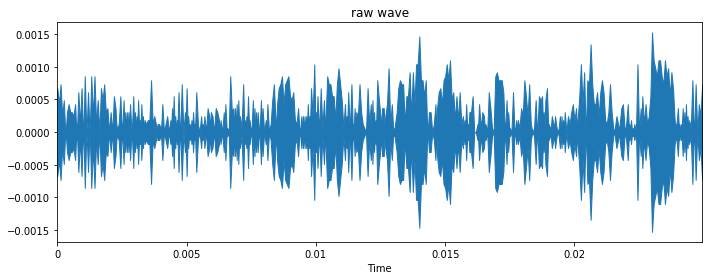

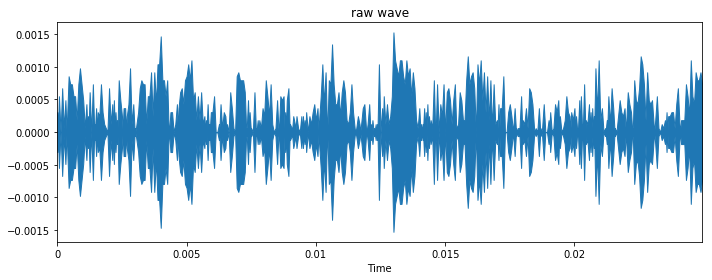

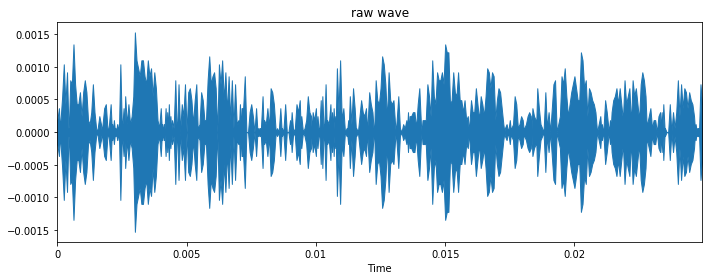

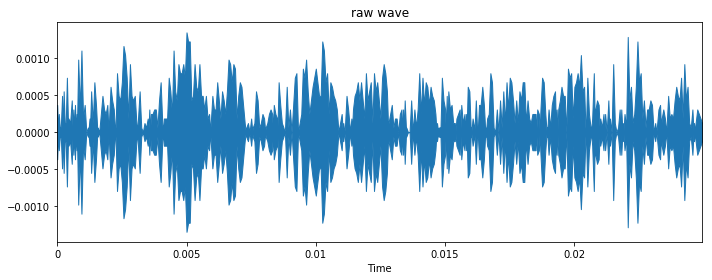

In [5]:
# display data
for i in range(5):
    plt.figure(figsize=(10, 4))
    librosa.display.waveplot(np.array(sam[i]), sr=16000, x_axis='time')
    plt.title('raw wave')
    plt.tight_layout()

In [6]:
# load labels
def load_labels(file_path):
    labels = []
    
    for filename in os.listdir(file_path):
        if filename.endswith(".txt"):
            file = open(file_path+filename, "r") 
            labels.append(file.read())
            
    return labels

In [7]:
training_dataset_path = "./an4_dataset/train/"
labels = load_labels(training_dataset_path)

validation_dataset_path = "./an4_dataset/validation/"
labels_valid = load_labels(validation_dataset_path)

# Step 1

Here we create a neural network, define a loss function (CTCLoss in our case) and an optimizer.

In [170]:
import torch
import torch.nn as nn

import torch.optim as optim

#from torch.nn.parameter import Parameter

#import torch.nn.functional as F

#import torch.nn.init as init
from torch.nn import Conv1d, Linear
from warpctc_pytorch import CTCLoss
from torch.autograd import Variable
from torch.nn.functional import relu
#, Conv2d, BatchNorm2d, MaxPool1d, Dropout2d, 
#, elu, relu6, sigmoid, tanh, softmax

import itertools


In [180]:
# hyperameters of the model
num_classes = 28
channels = 400
height = 638
# after first layer we restrict number of channels to 100 - we hope that network creates filterbanks. 
num_filters_conv1 = 100
kernel_size_conv1 = 2 # [height, width]
stride_conv1 = 1 # [stride_height, stride_width]
padding_conv1 = 0
dilation_conv1 = 2

# we are not using pooling layer because it had worse perfrmance , yet it is to further evalutaion
# we keep them same as the other model using mel-features

#2nd convolutional layer
num_filters_conv2 = 100
kernel_size_conv2 = 11 # [height, width]
stride_conv2 = 1 # [stride_height, stride_width]
padding_conv2 = 0
dilation_conv2 = 1

stride_pool2 = 2
kernel_size_pool2 = 2
padding_pool2 = 0
dilation_pool2 = 1

#3rd convolutional layer
num_filters_conv3 = 100
kernel_size_conv3 = 9 # [height, width]
stride_conv3 = 1 # [stride_height, stride_width]
padding_conv3 = 0
dilation_conv3 = 1


stride_pool3 = 2
kernel_size_pool3 = 2
padding_pool3 = 0
dilation_pool3 = 1

#4th convolutional layer
num_filters_conv4 = 100
kernel_size_conv4 = 9 # [height, width]
stride_conv4 = 1 # [stride_height, stride_width]
padding_conv4 = 0
dilation_conv4 = 1

#5th convolutional layer
num_filters_conv5 = 100
kernel_size_conv5 = 5 # [height, width]
stride_conv5 = 1 # [stride_height, stride_width]
padding_conv5 = 0
dilation_conv5 = 1

#6th convolutional layer
num_filters_conv6 = 100
kernel_size_conv6 = 5 # [height, width]
stride_conv6 = 1 # [stride_height, stride_width]
padding_conv6 = 0
dilation_conv6 = 1

#7th convolutional layer
num_filters_conv7 = 100
kernel_size_conv7 = 5 # [height, width]
stride_conv7 = 1 # [stride_height, stride_width]
padding_conv7 = 0
dilation_conv7 = 1

#8th convolutional layer
num_filters_conv8 = 100
kernel_size_conv8 = 3 # [height, width]
stride_conv8 = 1 # [stride_height, stride_width]
padding_conv8 = 0
dilation_conv8 = 1

#9th convolutional layer
num_filters_conv9 = 100
kernel_size_conv9 = 3 # [height, width]
stride_conv9 = 1 # [stride_height, stride_width]
padding_conv9 = 0
dilation_conv9 = 1


#10th convolutional layer
num_filters_conv10 = 100
kernel_size_conv10 = 3 # [height, width]
stride_conv10 = 1 # [stride_height, stride_width]
padding_conv10 = 0
dilation_conv10 = 1

#11th convolutional
num_filters_conv11 = 400
kernel_size_conv11 = 1
stride_conv11 = 1
padding_conv11 = 0
dilation_conv11 = 1

num_filters_conv12 = 28
kernel_size_conv12 = 1
stride_conv12 = 1
padding_conv12 = 0
dilation_conv12 = 1

batch_size=10
num_l1 = 512
dilation=1

def compute_conv_dim(dim_size):
    return int((dim_size - kernel_size_conv1 + 2 * padding_conv1) / stride_conv1 + 1)

def compute_maxPool_dim(dim_size):
    return int((dim_size - kernel_size_pool1 + 2 * padding_conv1) / stride_pool1 + 1)


def compute_conv_dim_1d(L_in, kernel_in, padding_in = 0, dilation_in = 1, stride_in = 1):
    return int((L_in + 2*padding_in - dilation_in*(kernel_in - 1) - 1)/stride_in + 1)

def compute_conv_height_2d(H_in, kernel_size_height, padding_height=0, dilation_height=1, stride_height=1):
    return int((H_in+2*padding_height-dilation_height*(kernel_size_height - 1) - 1)/stride_height + 1)

def compute_conv_width_2d(W_in,  kernel_size_width, padding_width=0, dilation_width=1, stride_width=1):
    return int((W_in+2*padding_width-dilation_width*(kernel_size_width-1) - 1)/stride_width + 1)

def compute_pool_dim_1d(L_in, kernel_in, padding_in = 0, dilation_in = 1, stride_in = 1):
    return int((L_in + 2*padding_in - dilation_in*(kernel_in - 1) - 1)/stride_in + 1)
    
# define network
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv_1 = Conv1d(in_channels=channels,
                             out_channels=num_filters_conv1,
                             kernel_size=kernel_size_conv1,
                             stride=stride_conv1,
                             padding=padding_conv1,
                             dilation=dilation_conv1)
        
        
        
        self.conv_dim_1=compute_conv_dim_1d(L_in=height, kernel_in=kernel_size_conv1,padding_in=padding_conv1,
                        dilation_in=dilation_conv1, stride_in=stride_conv1)
            
        self.conv_dropout_1=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_1=torch.nn.BatchNorm1d(num_filters_conv1)
        
        
        self.conv_2 = Conv1d(in_channels=num_filters_conv1,
                             out_channels=num_filters_conv2,
                             kernel_size=kernel_size_conv2,
                             stride=stride_conv2,
                             padding=padding_conv2,
                             dilation=dilation_conv2)
        
        
        
        
       
        self.conv_dim_2=compute_conv_dim_1d(L_in=self.conv_dim_1, kernel_in=kernel_size_conv2,padding_in=padding_conv2,
                        dilation_in=dilation_conv2, stride_in=stride_conv2)
        
        
        self.conv_dropout_2=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_2=torch.nn.BatchNorm1d(num_filters_conv2)
        
        self.conv_3 = Conv1d(in_channels=num_filters_conv2,
                             out_channels=num_filters_conv3,
                             kernel_size=kernel_size_conv3,
                             stride=stride_conv3,
                             padding=padding_conv3,
                             dilation=dilation_conv3)
        
        
        self.conv_dim_3=compute_conv_dim_1d(L_in=self.conv_dim_2, kernel_in=kernel_size_conv3,padding_in=padding_conv3,
                        dilation_in=dilation_conv3, stride_in=stride_conv3)
        
        
      
        
        self.conv_dropout_3=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_3=torch.nn.BatchNorm1d(num_filters_conv3)
        
        self.conv_4 = Conv1d(in_channels=num_filters_conv3,
                             out_channels=num_filters_conv4,
                             kernel_size=kernel_size_conv4,
                             stride=stride_conv4,
                             padding=padding_conv4,
                             dilation=dilation_conv4)
        
        
        
        
        self.conv_dim_4=compute_conv_dim_1d(L_in=self.conv_dim_3, kernel_in=kernel_size_conv4,padding_in=padding_conv4,
                        dilation_in=dilation_conv4, stride_in=stride_conv4)
        
        self.conv_dropout_4=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_4=torch.nn.BatchNorm1d(num_filters_conv4)
        
        self.conv_5 = Conv1d(in_channels=num_filters_conv4,
                             out_channels=num_filters_conv5,
                             kernel_size=kernel_size_conv5,
                             stride=stride_conv5,
                             padding=padding_conv5,
                             dilation=dilation_conv5)
        
        self.conv_dim_5=compute_conv_dim_1d(L_in=self.conv_dim_4, kernel_in=kernel_size_conv5,padding_in=padding_conv5,
                        dilation_in=dilation_conv5, stride_in=stride_conv5)
          
        
        
        self.conv_dropout_5=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_5=torch.nn.BatchNorm1d(num_filters_conv5)
        
        self.conv_6 = Conv1d(in_channels=num_filters_conv5,
                             out_channels=num_filters_conv6,
                             kernel_size=kernel_size_conv6,
                             stride=stride_conv6,
                             padding=padding_conv6,
                             dilation=dilation_conv6)
        
        self.conv_dim_6=compute_conv_dim_1d(L_in=self.conv_dim_5, kernel_in=kernel_size_conv6,padding_in=padding_conv6,
                        dilation_in=dilation_conv6, stride_in=stride_conv6)
        
        
        self.conv_dropout_6=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_6=torch.nn.BatchNorm1d(num_filters_conv6)
        
        self.conv_7 = Conv1d(in_channels=num_filters_conv6,
                             out_channels=num_filters_conv7,
                             kernel_size=kernel_size_conv7,
                             stride=stride_conv7,
                             padding=padding_conv7,
                             dilation=dilation_conv7)
        
        self.conv_dim_7 = compute_conv_dim_1d(L_in=self.conv_dim_6, kernel_in=kernel_size_conv7,padding_in=padding_conv7,
                        dilation_in=dilation_conv7, stride_in=stride_conv7)
          
        
        self.conv_dropout_7=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_7=torch.nn.BatchNorm1d(num_filters_conv7)
        
        self.conv_8 = Conv1d(in_channels=num_filters_conv7,
                             out_channels=num_filters_conv8,
                             kernel_size=kernel_size_conv8,
                             stride=stride_conv8,
                             padding=padding_conv8,
                             dilation=dilation_conv8)
        
        self.conv_dim_8 = compute_conv_dim_1d(L_in=self.conv_dim_7, kernel_in=kernel_size_conv8,padding_in=padding_conv8,
                        dilation_in=dilation_conv8, stride_in=stride_conv8)
          
        
        
        self.conv_dropout_8=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_8=torch.nn.BatchNorm1d(num_filters_conv8)
        
        
        self.conv_9 = Conv1d(in_channels=num_filters_conv8,
                             out_channels=num_filters_conv9,
                             kernel_size=kernel_size_conv9,
                             stride=stride_conv9,
                             padding=padding_conv9,
                             dilation=dilation_conv9)
        
        self.conv_dim_9 = compute_conv_dim_1d(L_in=self.conv_dim_8, kernel_in=kernel_size_conv9,padding_in=padding_conv9,
                        dilation_in=dilation_conv9, stride_in=stride_conv9)
          
        
        
        self.conv_dropout_9=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_9=torch.nn.BatchNorm1d(num_filters_conv9)
        
        
        self.l1_in_features = num_filters_conv9
        #self.l1_in_features = channels * height * width
        
        self.conv_10 = Conv1d(in_channels=num_filters_conv9,
                             out_channels=num_filters_conv10,
                             kernel_size=kernel_size_conv10,
                             stride=stride_conv10,
                             padding=padding_conv10,
                             dilation=dilation_conv10)
        
        self.conv_dim_10 = compute_conv_dim_1d(L_in=self.conv_dim_9, kernel_in=kernel_size_conv10,padding_in=padding_conv10,
                        dilation_in=dilation_conv10, stride_in=stride_conv10)
          
        
        
        self.conv_dropout_10=torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_10=torch.nn.BatchNorm1d(num_filters_conv10)
        
        self.conv_11 = Conv1d(in_channels=num_filters_conv10,
                             out_channels=num_filters_conv11,
                             kernel_size=kernel_size_conv11,
                             stride=stride_conv11,
                             padding=padding_conv11,
                             dilation=dilation_conv11)
        
        self.conv_dim_11 = compute_conv_dim_1d(L_in=self.conv_dim_10, kernel_in=kernel_size_conv11,padding_in=padding_conv11,
                        dilation_in=dilation_conv11, stride_in=stride_conv11)
          
        
        
        self.conv_dropout_11 = torch.nn.Dropout(p=0.3)
        self.conv_batchnorm_11 = torch.nn.BatchNorm1d(num_filters_conv11)
        
        
        self.conv_12 = Conv1d(in_channels=num_filters_conv11,
                             out_channels=num_filters_conv12,
                             kernel_size=kernel_size_conv12,
                             stride=stride_conv12,
                             padding=padding_conv12,
                             dilation=dilation_conv12)
        
        self.conv_dim_12 = compute_conv_dim_1d(L_in=self.conv_dim_11, kernel_in=kernel_size_conv12,padding_in=padding_conv12,
                        dilation_in=dilation_conv12, stride_in=stride_conv12)
        
        
        
        self.l1_in_features = num_filters_conv10
        
        self.l_1 = Linear(in_features=self.l1_in_features, 
                          out_features=num_l1,
                          bias=True)
        
        self.l_1_batchnorm = torch.nn.BatchNorm1d(self.conv_dim_10)
        self.l_1_dropout = torch.nn.Dropout(p=0.2)
        self.l_out = Linear(in_features=num_l1, 
                            out_features=num_classes,
                            bias=False)
    
    def forward(self, x, display_layers=False): # x.size() = [batch, channel, height, width]
        #print(x.shape)
        #(638, 1, 40)
        outs = []
        x = self.conv_1(x)
        #x = self.conv_pool_1(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_1(x)
        x = self.conv_dropout_1(x)
        
        
        
        x = self.conv_2(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_2(x)
        x = self.conv_dropout_2(x)
        
        
        x = self.conv_3(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_3(x)
        x = self.conv_dropout_3(x)
        
        
        x = self.conv_4(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_4(x)
        x = self.conv_dropout_4(x)
        
        
        x = self.conv_5(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_5(x)
        x = self.conv_dropout_5(x)
        
        
        x = self.conv_6(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_6(x)
        x = self.conv_dropout_6(x)
        
        
        x = self.conv_7(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_7(x)
        x = self.conv_dropout_7(x)
        
        
        x = self.conv_8(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_8(x)
        x = self.conv_dropout_8(x)
    
        
        x = self.conv_9(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_9(x)
        x = self.conv_dropout_9(x)
    
    
        x = self.conv_10(x)
        outs.append(x)
        x = relu(x)
        x = self.conv_batchnorm_10(x)
        x = self.conv_dropout_10(x)
    
    
        x = self.conv_11(x)
        outs.append(x)
        x = self.conv_batchnorm_11(relu(x))
        x = self.conv_dropout_11(x)
        
        x = self.conv_12(x)
        outs.append(x)
        x = x.permute(0, 2, 1)
        
        # torch.Tensor.view: http://pytorch.org/docs/master/tensors.html?highlight=view#torch.Tensor.view
        #   Returns a new tensor with the same data as the self tensor,
        #   but of a different size.
        # the size -1 is inferred from other dimensions 
        #print(x.shape)#NCHW to HCNW
        #x=x.permute(0, 2, 1, 3)
        #print(x.shape)
        #x=x.contiguous()
        
        #print(x.shape)
        #x = self.dropout(relu(self.l_1(x)))
        #x = relu(self.l_1(x))
        #print(x.shape)
        if(display_layers):
            return outs, x
        else:
            return x

In [181]:
net = Net()
print(net)

Net(
  (conv_1): Conv1d(400, 100, kernel_size=(2,), stride=(1,), dilation=(2,))
  (conv_dropout_1): Dropout(p=0.3)
  (conv_batchnorm_1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_2): Conv1d(100, 100, kernel_size=(11,), stride=(1,))
  (conv_dropout_2): Dropout(p=0.3)
  (conv_batchnorm_2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv1d(100, 100, kernel_size=(9,), stride=(1,))
  (conv_dropout_3): Dropout(p=0.3)
  (conv_batchnorm_3): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv1d(100, 100, kernel_size=(9,), stride=(1,))
  (conv_dropout_4): Dropout(p=0.3)
  (conv_batchnorm_4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_5): Conv1d(100, 100, kernel_size=(5,), stride=(1,))
  (conv_dropout_5): Dropout(p=0.3)
  (conv_batchnorm_5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [182]:
criterion = CTCLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

# Step 2

* In here we prepare the lables - characters A - Z, space and blank character
* number of samples used for training
* number of epochs for the training

In [183]:
num_epochs = 4000
valid_epochs=100
num_samples = 948
all_labels= [
    "-",
    "A",
    "B",
    "C",
    "D",
    "E",
    "F",
    "G",
    "H",
    "I",
    "J",
    "K",
    "L",
    "M",
    "N",
    "O",
    "P",
    "Q",
    "R",
    "S",
    "T",
    "U",
    "V",
    "W",
    "X",
    "Y",
    "Z",
    " ",
]

char_to_number = dict()

for idx, i in enumerate(all_labels) :
    char_to_number[i] = idx
    
    
print(char_to_number)
char_to_number['-']

{'-': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, ' ': 27}


0

In [184]:
def display_cost(costs, num_epochs):
    print(len(costs))
    x = np.arange(0, num_epochs, 1)
    print(len(x))
    print(num_epochs)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.plot(x, costs)
    plt.show()
    
def display_cost_eval(costs, num_epochs, eval_eps):
    print(len(costs))
    x = np.arange(0, num_epochs, eval_eps)
    print(len(x))
    print(num_epochs)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Cost")
    ax.plot(x, costs)
    plt.show()


def greedy_decoder(outs, all_labels):
    """
    """
    
    outputs=outs
    string=[]
    maximals, indices = outputs.max(1)
    for i in indices:
        string.append(all_labels[i])
    itertools.groupby(string)
    string=[k for k, g in itertools.groupby(string)]
    output =[]
    for s in string:
        if s != "-":
            output.append(s)
    
    #print(output)
    return output

def WER(predicted, ground_truth):
    arr=np.zeros([len(predicted) + 1, len(ground_truth) + 1])
    
    
    i = 0
    while i < len(arr):
        j = 0
        
        while j < len(arr[i]):
            if i == 0:
                arr[0][j] = j
            elif j == 0:
                arr[i][0] = i
    
            j = j + 1
        i = i + 1
        
    i = 1
    while i < len(arr):
        
        j = 1
        while j < len(arr[i]):
            if predicted[i - 1] == ground_truth[j - 1]:
                arr[i][j] = arr[i - 1][j - 1]
            else:
                replace = arr[i-1][j-1] + 1
                insert  = arr[i][j-1]   + 1
                delete  = arr[i-1][j]   + 1
                arr[i][j]=min(replace, insert, delete)
            j = j + 1
        i = i + 1
    
    return arr[len(predicted)][len(ground_truth)]/len(predicted.split())

def add_string_to_histogram(hist, string_in):
    for i in string_in:
        if(i == " "):
            hist[26] +=1
        else:
            #print(ord(i))
            hist[ord(i) - 65] += 1
    
    return hist

def plot_histogram(histogram):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    names =  ['A','B','C','D', 'E','F', 'G', 'H', 'I', 'J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z', ' ']
    x_coordinates = np.arange(len(histogram))
    ax.bar(x_coordinates, histogram, align='center')
    ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
    ax.xaxis.set_major_formatter(plt.FixedFormatter(names))
    plt.show()
    
def prediction_comparator(matrix, truth, predicted):
    """
    matrix [28]x[28] matrix where one index is for truth and another for predicted
    """
    
    if len(truth) > len(predicted):
        i = 0
        while i < len(predicted):
            c1 = truth[i]
            c2 = predicted[i]
            if (c1 == " "):
                index1 = 26
            else:
                index1 = ord(c1) - 65
            
            if(c2 == " "):
                index2 = 26
            else:
                index2 = ord(c2) - 65
            matrix[index1][index2] += 1
            i = i +1
        while i < len(truth):
            c1 = truth[i]
            if (c1 == " "):
                index1 = 26
            else:
                index1 = ord(c1) - 65
             
            matrix[index1][27] += 1
            i = i + 1
    else:
        i = 0
        while i < len(truth):
            c1 = truth[i]
            c2 = predicted[i]
            if (c1 == " "):
                index1 = 26
            else:
                index1 = ord(c1) - 65
            
            if(c2 == " "):
                index2 = 26
            else:
                index2 = ord(c2) - 65
            matrix[index1][index2] += 1
            i = i +1
        while i < len(predicted):
            c2 = predicted[i]
            if(c2 == " "):
                index2 = 26
            else:
                index2 = ord(c2) - 65
            matrix[27][index2] += 1
            i = i + 1
    return matrix

def print_comparisons(matrix):
    letters =  ['A', 'B','C','D', 'E','F', 'G', 'H', 'I', 'J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z', ' ', '-']
    
    header1 = "  [A"

    for i, character in enumerate(letters):
        if(i > 0):
            header1 = header1 + ", " + character

    print(header1)
    
    for i, item in enumerate(matrix):
        print(letters[i], end=" ")
        print(item)

[310, 189, 85, 149, 2253, 573, 300, 619, 1027, 55, 70, 173, 101, 1177, 1131, 153, 30, 876, 672, 1426, 439, 455, 387, 273, 356, 81, 4494]


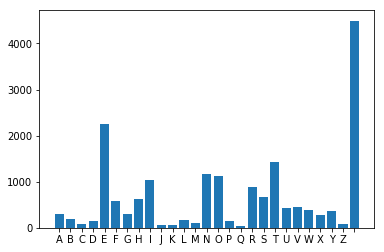

In [185]:
hist_labels = [0]*27
#print(hist_labels)
for s in labels:
    #print(s)
    hist_labels=add_string_to_histogram(hist_labels, ''.join(s))
print(hist_labels)


plot_histogram(hist_labels)

In [186]:
def ler_extended(ref, hyp ,debug=False):
    r = list(ref)
    h = list(hyp)
    #costs will holds the costs, like in the Levenshtein distance algorithm
    costs = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]
    # backtrace will hold the operations we've done.
    # so we could later backtrace, like the WER algorithm requires us to.
    backtrace = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]
 
    OP_OK = 0
    OP_SUB = 1
    OP_INS = 2
    OP_DEL = 3
    
    SUB_PENALTY = 1
    INS_PENALTY = 1
    DEL_PENALTY = 1
     
    # First column represents the case where we achieve zero
    # hypothesis words by deleting all reference words.
    for i in range(1, len(r)+1):
        costs[i][0] = DEL_PENALTY*i
        backtrace[i][0] = OP_DEL
         
    # First row represents the case where we achieve the hypothesis
    # by inserting all hypothesis words into a zero-length reference.
    for j in range(1, len(h) + 1):
        costs[0][j] = INS_PENALTY * j
        backtrace[0][j] = OP_INS
     
    # computation
    for i in range(1, len(r)+1):
        for j in range(1, len(h)+1):
            if r[i-1] == h[j-1]:
                costs[i][j] = costs[i-1][j-1]
                backtrace[i][j] = OP_OK
            else:
                substitutionCost = costs[i-1][j-1] + SUB_PENALTY # penalty is always 1
                insertionCost    = costs[i][j-1] + INS_PENALTY   # penalty is always 1
                deletionCost     = costs[i-1][j] + DEL_PENALTY   # penalty is always 1
                 
                costs[i][j] = min(substitutionCost, insertionCost, deletionCost)
                if costs[i][j] == substitutionCost:
                    backtrace[i][j] = OP_SUB
                elif costs[i][j] == insertionCost:
                    backtrace[i][j] = OP_INS
                else:
                    backtrace[i][j] = OP_DEL
                 
    # back trace though the best route:
    i = len(r)
    j = len(h)
    numSub = 0
    numDel = 0
    numIns = 0
    numCor = 0
    if debug:
        print("OP\tREF\tHYP")
        lines = []
    while i > 0 or j > 0:
        if backtrace[i][j] == OP_OK:
            numCor += 1
            i-=1
            j-=1
            if debug:
                lines.append("OK\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_SUB:
            numSub +=1
            i-=1
            j-=1
            if debug:
                lines.append("SUB\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_INS:
            numIns += 1
            j-=1
            if debug:
                lines.append("INS\t" + "****" + "\t" + h[j])
        elif backtrace[i][j] == OP_DEL:
            numDel += 1
            i-=1
            if debug:
                lines.append("DEL\t" + r[i]+"\t"+"****")
    if debug:
        lines = reversed(lines)
        for line in lines:
            print(line)
        print("#cor " + str(numCor))
        print("#sub " + str(numSub))
        print("#del " + str(numDel))
        print("#ins " + str(numIns))
    #return (numSub + numDel + numIns) / (float) (len(r))
    if len(r) == 0:
        r = str(1)
    wer_result = round( (numSub + numDel + numIns) / (float) (len(r)), 3)
    
    return {'LER':(numSub + numDel + numIns),'WER':wer_result, 'Correct':numCor, 'Sub':numSub, 'Ins':numIns, 'Del':numDel}

# Step 3

* In here we train the network

Cost:  626.07265625
Cost:  387.301806640625
Cost:  275.07646484375
Cost:  160.62930908203126
Cost:  153.080517578125
Cost:  149.6531494140625
Cost:  150.51591796875
Cost:  151.82420654296874
Cost:  152.2722900390625
Cost:  151.0144287109375
Number of epochs: 10
10
10
10


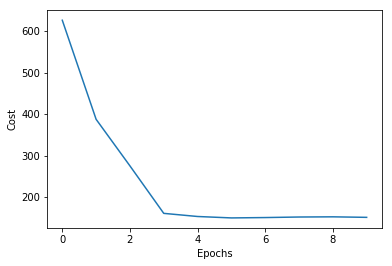

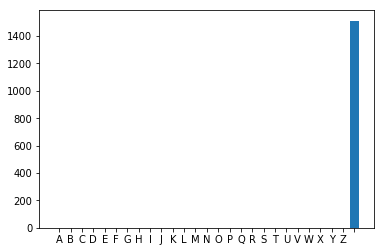

Cost:  151.65494384765626
Cost:  152.84163818359374
Cost:  153.7055419921875
Cost:  153.27227783203125
Cost:  153.0822998046875
Cost:  153.5623779296875
Cost:  153.5741455078125
Cost:  153.22763671875
Cost:  150.227734375
Cost:  151.96640625
Number of epochs: 20
20
20
20


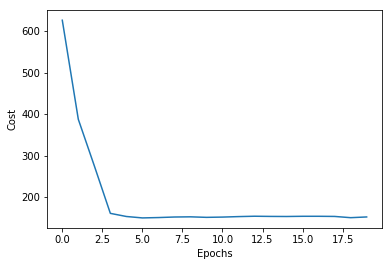

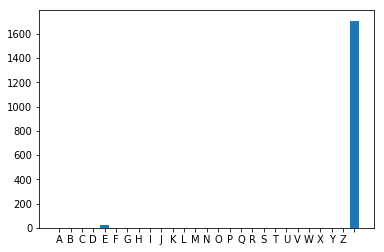

Cost:  153.3353759765625
Cost:  153.72979736328125
Cost:  153.23623046875
Cost:  154.027587890625
Cost:  150.8008544921875
Cost:  150.5497802734375
Cost:  149.82581787109376
Cost:  150.41593017578126
Cost:  149.690185546875
Cost:  149.67703857421876
Number of epochs: 30
30
30
30


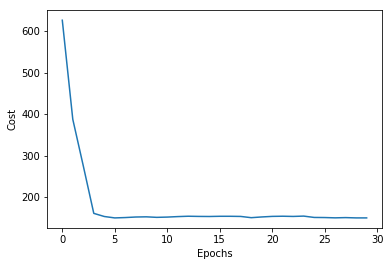

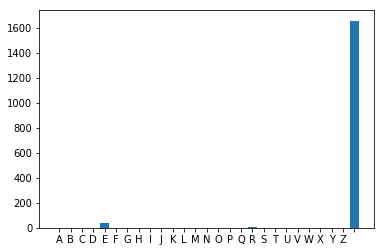

Cost:  148.90550537109374
Cost:  149.8156005859375
Cost:  149.58162841796874
Cost:  147.83218994140626
Cost:  149.46087646484375
Cost:  149.95396728515624
Cost:  147.65965576171874
Cost:  149.8691162109375
Cost:  149.50162353515626
Cost:  148.86143798828124
Number of epochs: 40
40
40
40


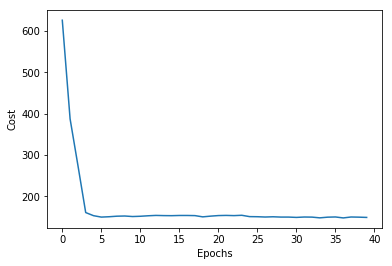

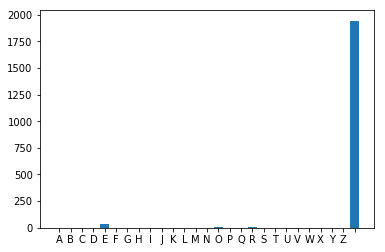

Cost:  146.38614501953126
Cost:  149.115625
Cost:  150.10889892578126
Cost:  146.66585693359374
Cost:  149.0048828125
Cost:  147.56251220703126
Cost:  149.25816650390624
Cost:  147.694873046875
Cost:  146.5580810546875
Cost:  147.3521728515625
Number of epochs: 50
50
50
50


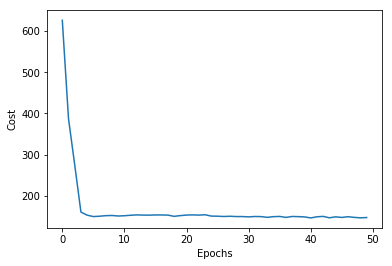

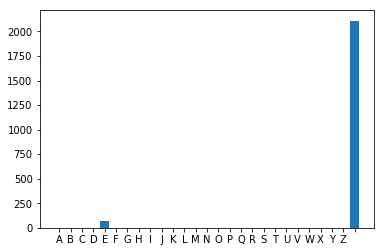

Cost:  148.6567626953125
Cost:  148.03001708984374
Cost:  147.70635986328125
Cost:  145.091064453125
Cost:  146.67783203125
Cost:  147.6153076171875
Cost:  148.8421630859375
Cost:  147.08565673828124
Cost:  146.873095703125
Cost:  148.183544921875
Number of epochs: 60
60
60
60


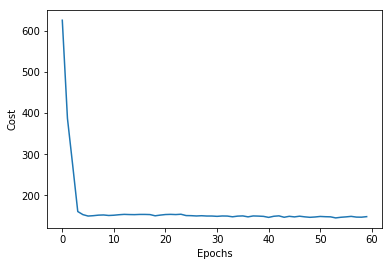

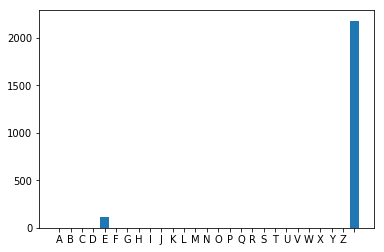

Cost:  148.3962158203125
Cost:  148.97515869140625
Cost:  148.157275390625
Cost:  148.2230712890625
Cost:  147.77362060546875
Cost:  147.44798583984374
Cost:  146.83741455078126
Cost:  147.956494140625
Cost:  146.88431396484376
Cost:  147.25933837890625
Number of epochs: 70
70
70
70


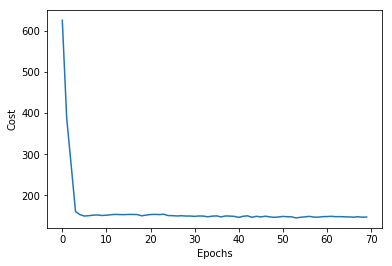

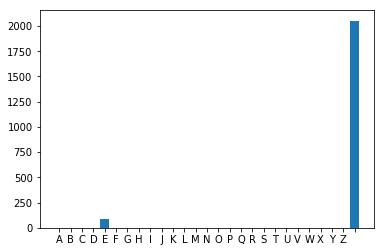

Cost:  147.17452392578124
Cost:  143.7489013671875
Cost:  146.329296875
Cost:  146.321240234375
Cost:  146.97352294921876
Cost:  146.74893798828126
Cost:  147.99608154296874
Cost:  146.76434326171875
Cost:  147.473388671875
Cost:  146.166796875
Number of epochs: 80
80
80
80


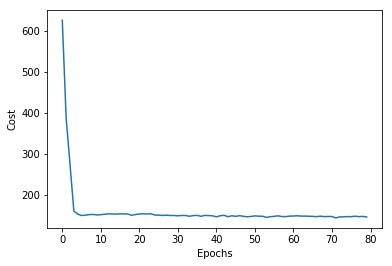

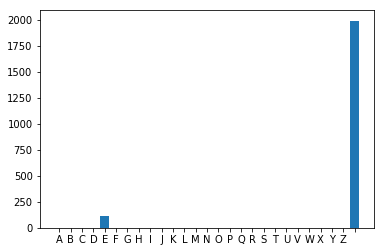

Cost:  147.5167724609375
Cost:  147.0831298828125
Cost:  146.5956787109375
Cost:  140.01204833984374
Cost:  147.83641357421874
Cost:  146.808984375
Cost:  146.43446044921876
Cost:  147.06387939453126
Cost:  146.8780029296875
Cost:  146.96751708984374
Number of epochs: 90
90
90
90


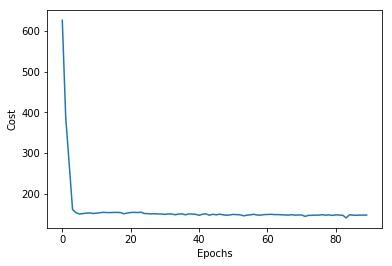

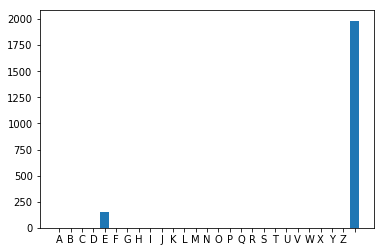

Cost:  147.6007568359375
Cost:  146.5895751953125
Cost:  145.67193603515625
Cost:  149.25635986328126
Cost:  146.77857666015626
Cost:  146.82763671875
Cost:  146.55810546875
Cost:  145.99154052734374
Cost:  145.6173583984375
Cost:  143.48240966796874
Number of epochs: 100
100
100
100


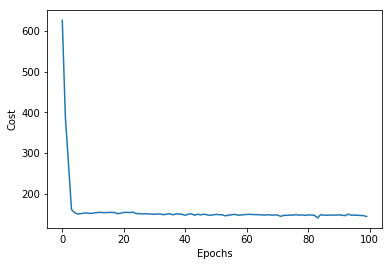

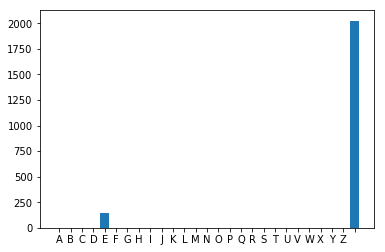

0
torch.Size([1, 592, 28])
Predicted:    
Ground truth: ENTER TWO NINE EIGHT ONE
WER: 
inf
LER: 
{'LER': 21, 'WER': 7.0, 'Correct': 3, 'Sub': 0, 'Ins': 21, 'Del': 0}
1
torch.Size([1, 592, 28])
Predicted:  
Ground truth: REPEAT
WER: 
inf
LER: 
{'LER': 6, 'WER': 6.0, 'Correct': 0, 'Sub': 1, 'Ins': 5, 'Del': 0}
2
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ERASE U D B E FIVE
WER: 
inf
LER: 
{'LER': 17, 'WER': 17.0, 'Correct': 1, 'Sub': 0, 'Ins': 17, 'Del': 0}
3
torch.Size([1, 592, 28])
Predicted:  
Ground truth: RUBOUT U B U T R SIX
WER: 
inf
LER: 
{'LER': 19, 'WER': 19.0, 'Correct': 1, 'Sub': 0, 'Ins': 19, 'Del': 0}
4
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ENTER ONE OH FOUR
WER: 
inf
LER: 
{'LER': 16, 'WER': 16.0, 'Correct': 1, 'Sub': 0, 'Ins': 16, 'Del': 0}
5
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ERASE A B F N Q FIFTY SEVEN
WER: 
inf
LER: 
{'LER': 26, 'WER': 26.0, 'Correct': 1, 'Sub': 0, 'Ins': 26, 'Del': 0}
6
torch.Size([1, 592, 28])
Predicted:  
Grou

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars


torch.Size([1, 592, 28])
Predicted:  
Ground truth: NO
WER: 
inf
LER: 
{'LER': 2, 'WER': 2.0, 'Correct': 0, 'Sub': 1, 'Ins': 1, 'Del': 0}
12
torch.Size([1, 592, 28])
Predicted:   
Ground truth: G F T U ONE THREE THREE TWO
WER: 
inf
LER: 
{'LER': 25, 'WER': 12.5, 'Correct': 2, 'Sub': 0, 'Ins': 25, 'Del': 0}
13
torch.Size([1, 592, 28])
Predicted:  
Ground truth: L K K N THIRTY EIGHT
WER: 
inf
LER: 
{'LER': 19, 'WER': 19.0, 'Correct': 1, 'Sub': 0, 'Ins': 19, 'Del': 0}
14
torch.Size([1, 592, 28])
Predicted:     
Ground truth: RUBOUT V Z J H P SEVEN THIRTY SIX
WER: 
inf
LER: 
{'LER': 29, 'WER': 7.25, 'Correct': 4, 'Sub': 0, 'Ins': 29, 'Del': 0}
15
torch.Size([1, 592, 28])
Predicted:  
Ground truth: RUBOUT G M E F THREE NINE
WER: 
inf
LER: 
{'LER': 24, 'WER': 24.0, 'Correct': 1, 'Sub': 0, 'Ins': 24, 'Del': 0}
16
torch.Size([1, 592, 28])
Predicted:   
Ground truth: ERASE C Q Q F SEVEN
WER: 
inf
LER: 
{'LER': 17, 'WER': 8.5, 'Correct': 2, 'Sub': 0, 'Ins': 17, 'Del': 0}
17
torch.Size([1, 592, 2

torch.Size([1, 592, 28])
Predicted:  
Ground truth: I V A N
WER: 
inf
LER: 
{'LER': 6, 'WER': 6.0, 'Correct': 1, 'Sub': 0, 'Ins': 6, 'Del': 0}
67
torch.Size([1, 592, 28])
Predicted:    
Ground truth: J O H N
WER: 
inf
LER: 
{'LER': 4, 'WER': 1.333, 'Correct': 3, 'Sub': 0, 'Ins': 4, 'Del': 0}
68
torch.Size([1, 592, 28])
Predicted:  
Ground truth: J E F F R E Y
WER: 
inf
LER: 
{'LER': 12, 'WER': 12.0, 'Correct': 1, 'Sub': 0, 'Ins': 12, 'Del': 0}
69
torch.Size([1, 592, 28])
Predicted:  
Ground truth: M I C H A E L
WER: 
inf
LER: 
{'LER': 12, 'WER': 12.0, 'Correct': 1, 'Sub': 0, 'Ins': 12, 'Del': 0}
70
torch.Size([1, 592, 28])
Predicted:   
Ground truth: ONE THREE SEVEN
WER: 
inf
LER: 
{'LER': 13, 'WER': 6.5, 'Correct': 2, 'Sub': 0, 'Ins': 13, 'Del': 0}
71
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ONE FIFTY
WER: 
inf
LER: 
{'LER': 8, 'WER': 8.0, 'Correct': 1, 'Sub': 0, 'Ins': 8, 'Del': 0}
72
torch.Size([1, 592, 28])
Predicted:  
Ground truth: THREE ZERO TWO ONE
WER: 
inf
LER: 
{'

Predicted:  
Ground truth: SIX EIGHT THREE THREE OH SEVEN FIVE
WER: 
inf
LER: 
{'LER': 34, 'WER': 34.0, 'Correct': 1, 'Sub': 0, 'Ins': 34, 'Del': 0}
118
torch.Size([1, 592, 28])
Predicted:  
Ground truth: EIGHT SIX TWO OH THREE EIGHT SEVEN
WER: 
inf
LER: 
{'LER': 33, 'WER': 33.0, 'Correct': 1, 'Sub': 0, 'Ins': 33, 'Del': 0}
119
torch.Size([1, 592, 28])
Predicted:     
Ground truth: FOUR ONE TWO TWO SIX EIGHT FOUR ONE FOUR TWO
WER: 
inf
LER: 
{'LER': 40, 'WER': 10.0, 'Correct': 4, 'Sub': 0, 'Ins': 40, 'Del': 0}
120
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ELEVEN TWENTY SEVEN FIFTY SEVEN
WER: 
inf
LER: 
{'LER': 30, 'WER': 30.0, 'Correct': 1, 'Sub': 0, 'Ins': 30, 'Del': 0}
121
torch.Size([1, 592, 28])
Predicted:  
Ground truth: TWELVE TWENTY NINE FIFTY NINE
WER: 
inf
LER: 
{'LER': 28, 'WER': 28.0, 'Correct': 1, 'Sub': 0, 'Ins': 28, 'Del': 0}
122
torch.Size([1, 592, 28])
Predicted:  
Ground truth: TEN TWENTY SEVEN SIXTY TWO
WER: 
inf
LER: 
{'LER': 25, 'WER': 25.0, 'Correct': 1, 

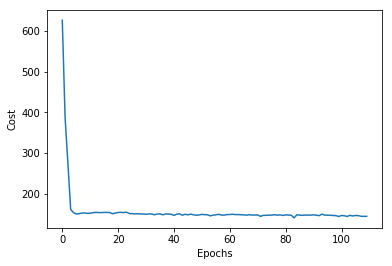

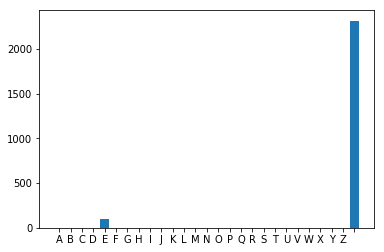

Cost:  142.2570556640625
Cost:  144.06827392578126
Cost:  143.22252197265624
Cost:  144.376171875
Cost:  140.88487548828124
Cost:  140.91815185546875
Cost:  139.27044677734375
Cost:  140.1236572265625
Cost:  136.70362548828126
Cost:  139.3971923828125
Number of epochs: 120
120
120
120


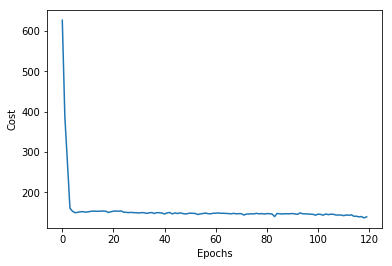

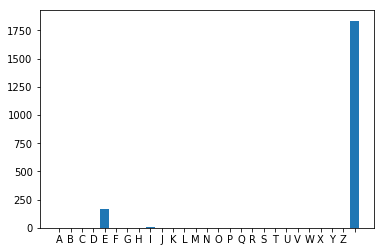

Cost:  137.974365234375
Cost:  137.340283203125
Cost:  135.05731201171875
Cost:  139.672021484375
Cost:  137.1173095703125
Cost:  138.47869873046875
Cost:  135.92484130859376
Cost:  136.36669921875
Cost:  132.55609130859375
Cost:  137.0092529296875
Number of epochs: 130
130
130
130


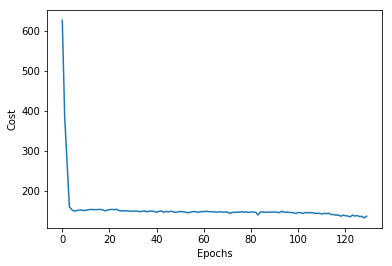

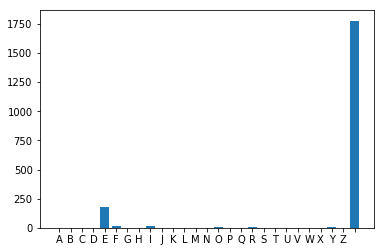

Cost:  135.142724609375
Cost:  131.92625732421874
Cost:  135.55303955078125
Cost:  137.7022705078125
Cost:  137.87830810546876
Cost:  133.25557861328124
Cost:  133.966162109375
Cost:  134.36845703125
Cost:  133.43446044921876
Cost:  131.67103271484376
Number of epochs: 140
140
140
140


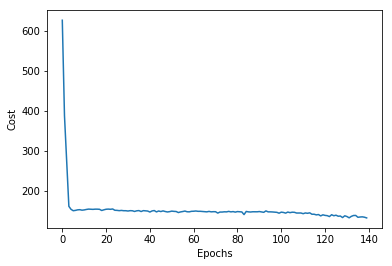

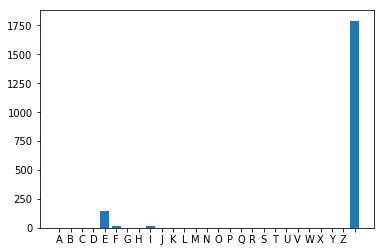

Cost:  131.19171142578125
Cost:  132.91171875
Cost:  133.1798095703125
Cost:  130.25894775390626
Cost:  130.615673828125
Cost:  126.24693603515625
Cost:  127.90875244140625
Cost:  126.9921875
Cost:  119.48160400390626
Cost:  123.2201171875
Number of epochs: 150
150
150
150


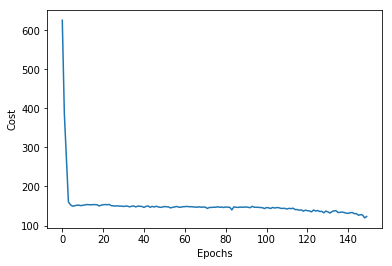

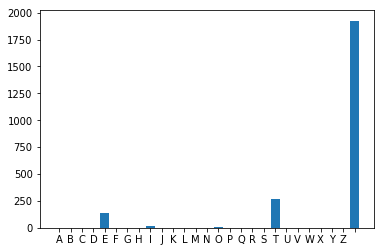

Cost:  117.32320556640624
Cost:  115.7247802734375
Cost:  112.5906005859375
Cost:  113.8357177734375
Cost:  117.18287353515625
Cost:  110.185009765625
Cost:  118.2749267578125
Cost:  115.31728515625
Cost:  117.03616943359376
Cost:  117.574072265625
Number of epochs: 160
160
160
160


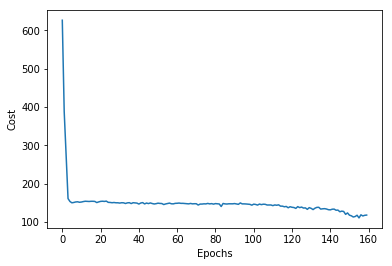

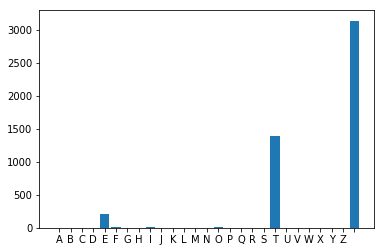

Cost:  114.47774658203124
Cost:  111.95606689453125
Cost:  120.556201171875
Cost:  115.866162109375
Cost:  118.0667724609375
Cost:  115.65565185546875
Cost:  111.60970458984374
Cost:  112.03916015625
Cost:  109.1220703125
Cost:  109.1415283203125
Number of epochs: 170
170
170
170


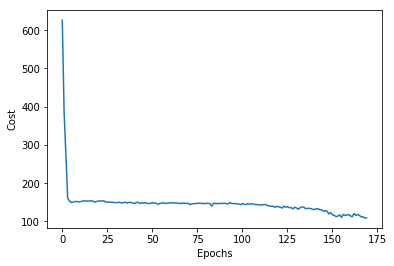

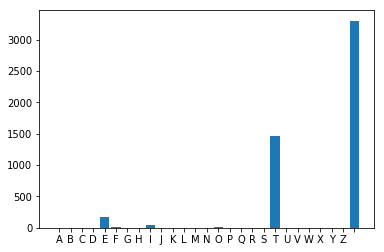

Cost:  109.76851806640624
Cost:  110.58394775390624
Cost:  108.4979736328125
Cost:  109.576611328125
Cost:  109.5829345703125
Cost:  107.06373291015625
Cost:  108.0641357421875
Cost:  106.31146240234375
Cost:  108.13369140625
Cost:  107.10081787109375
Number of epochs: 180
180
180
180


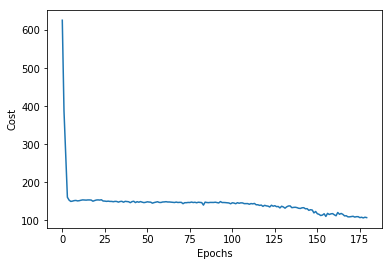

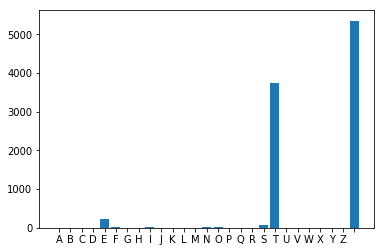

Cost:  107.61229248046875
Cost:  106.8108154296875
Cost:  110.11773681640625
Cost:  119.45482177734375
Cost:  113.46595458984375
Cost:  108.6139404296875
Cost:  105.15849609375
Cost:  110.52391357421875
Cost:  106.70040283203124
Cost:  106.3239013671875
Number of epochs: 190
190
190
190


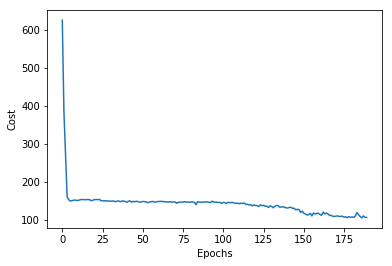

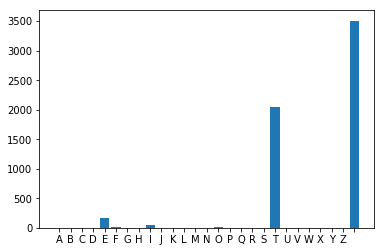

Cost:  107.19036865234375
Cost:  107.0037841796875
Cost:  106.568212890625
Cost:  105.5994140625
Cost:  114.0139892578125
Cost:  109.97293701171876
Cost:  107.02001953125
Cost:  103.7567626953125
Cost:  105.61796875
Cost:  139.16763916015626
Number of epochs: 200
200
200
200


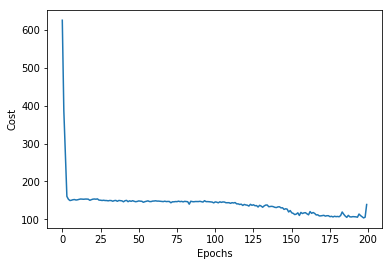

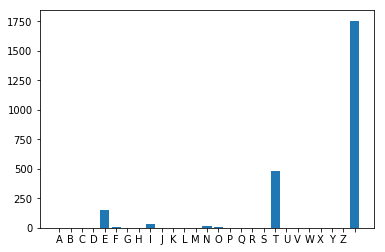

0
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ENTER TWO NINE EIGHT ONE
WER: 
inf
LER: 
{'LER': 23, 'WER': 23.0, 'Correct': 1, 'Sub': 0, 'Ins': 23, 'Del': 0}
1
torch.Size([1, 592, 28])
Predicted:  
Ground truth: REPEAT
WER: 
inf
LER: 
{'LER': 6, 'WER': 6.0, 'Correct': 0, 'Sub': 1, 'Ins': 5, 'Del': 0}
2
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ERASE U D B E FIVE
WER: 
inf
LER: 
{'LER': 17, 'WER': 17.0, 'Correct': 1, 'Sub': 0, 'Ins': 17, 'Del': 0}
3
torch.Size([1, 592, 28])
Predicted:  
Ground truth: RUBOUT U B U T R SIX
WER: 
inf
LER: 
{'LER': 19, 'WER': 19.0, 'Correct': 1, 'Sub': 0, 'Ins': 19, 'Del': 0}
4
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ENTER ONE OH FOUR
WER: 
inf
LER: 
{'LER': 16, 'WER': 16.0, 'Correct': 1, 'Sub': 0, 'Ins': 16, 'Del': 0}
5
torch.Size([1, 592, 28])
Predicted:   
Ground truth: ERASE A B F N Q FIFTY SEVEN
WER: 
inf
LER: 
{'LER': 25, 'WER': 12.5, 'Correct': 2, 'Sub': 0, 'Ins': 25, 'Del': 0}
6
torch.Size([1, 592, 28])
Predicted:  
Grou

torch.Size([1, 592, 28])
Predicted:  
Ground truth: K A U F M A N
WER: 
inf
LER: 
{'LER': 12, 'WER': 12.0, 'Correct': 1, 'Sub': 0, 'Ins': 12, 'Del': 0}
56
torch.Size([1, 592, 28])
Predicted:  
Ground truth: Y A N A S A K
WER: 
inf
LER: 
{'LER': 12, 'WER': 12.0, 'Correct': 1, 'Sub': 0, 'Ins': 12, 'Del': 0}
57
torch.Size([1, 592, 28])
Predicted:  
Ground truth: M Y E R S
WER: 
inf
LER: 
{'LER': 8, 'WER': 8.0, 'Correct': 1, 'Sub': 0, 'Ins': 8, 'Del': 0}
58
torch.Size([1, 592, 28])
Predicted:  
Ground truth: L E V I S O N
WER: 
inf
LER: 
{'LER': 12, 'WER': 12.0, 'Correct': 1, 'Sub': 0, 'Ins': 12, 'Del': 0}
59
torch.Size([1, 592, 28])
Predicted:   
Ground truth: G I N S B E R G
WER: 
inf
LER: 
{'LER': 13, 'WER': 6.5, 'Correct': 2, 'Sub': 0, 'Ins': 13, 'Del': 0}
60
torch.Size([1, 592, 28])
Predicted:    
Ground truth: C I N D Y
WER: 
inf
LER: 
{'LER': 6, 'WER': 2.0, 'Correct': 3, 'Sub': 0, 'Ins': 6, 'Del': 0}
61
torch.Size([1, 592, 28])
Predicted:  
Ground truth: J A N E T
WER: 
inf
LER: 
{'

torch.Size([1, 592, 28])
Predicted:  
Ground truth: ONE FIVE TWO ONE THREE
WER: 
inf
LER: 
{'LER': 21, 'WER': 21.0, 'Correct': 1, 'Sub': 0, 'Ins': 21, 'Del': 0}
110
torch.Size([1, 592, 28])
Predicted:    
Ground truth: SIX FIVE FIVE EIGHT SEVEN FOUR ZERO
WER: 
inf
LER: 
{'LER': 32, 'WER': 10.667, 'Correct': 3, 'Sub': 0, 'Ins': 32, 'Del': 0}
111
torch.Size([1, 592, 28])
Predicted:  
Ground truth: THREE THREE ONE OH ONE EIGHT EIGHT
WER: 
inf
LER: 
{'LER': 33, 'WER': 33.0, 'Correct': 1, 'Sub': 0, 'Ins': 33, 'Del': 0}
112
torch.Size([1, 592, 28])
Predicted:  
Ground truth: EIGHT EIGHT FOUR THREE SIX FOUR EIGHT
WER: 
inf
LER: 
{'LER': 36, 'WER': 36.0, 'Correct': 1, 'Sub': 0, 'Ins': 36, 'Del': 0}
113
torch.Size([1, 592, 28])
Predicted:  
Ground truth: SIX EIGHT THREE SIX ZERO TWO SEVEN
WER: 
inf
LER: 
{'LER': 33, 'WER': 33.0, 'Correct': 1, 'Sub': 0, 'Ins': 33, 'Del': 0}
114
torch.Size([1, 592, 28])
Predicted:  
Ground truth: SEVEN ONE SIX TWO FOUR FOUR SIX SEVEN ONE FOUR
WER: 
inf
LER: 
{'LE

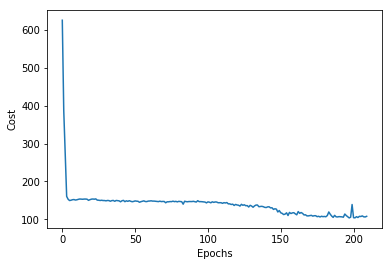

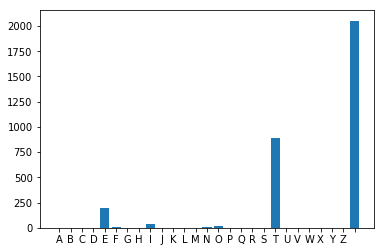

Cost:  106.84742431640625
Cost:  103.34990234375
Cost:  106.879443359375
Cost:  111.30693359375
Cost:  104.0362548828125
Cost:  106.3066162109375
Cost:  103.4991455078125
Cost:  103.37481689453125
Cost:  107.97984619140625
Cost:  103.69830322265625
Number of epochs: 220
220
220
220


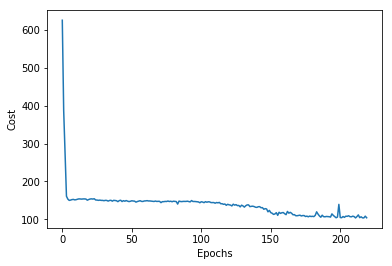

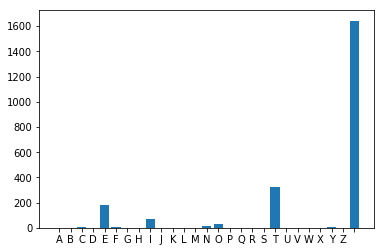

Cost:  109.742626953125
Cost:  106.6712646484375
Cost:  101.24248657226562
Cost:  104.346240234375
Cost:  102.9422607421875
Cost:  103.18511962890625
Cost:  109.45709228515625
Cost:  102.22014770507812
Cost:  108.848974609375
Cost:  105.2648193359375
Number of epochs: 230
230
230
230


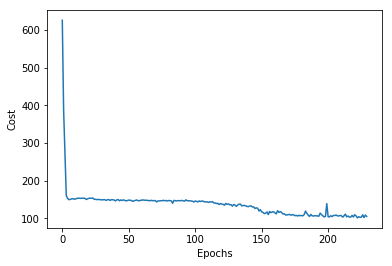

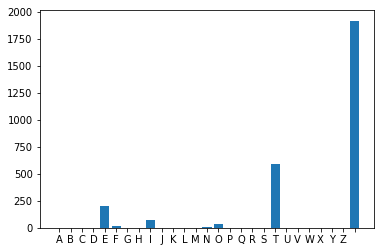

Cost:  100.49585571289063
Cost:  104.81353759765625
Cost:  108.2660400390625
Cost:  104.3479736328125
Cost:  105.59071044921875
Cost:  102.6180419921875
Cost:  112.552587890625
Cost:  101.66234130859375
Cost:  106.25750732421875
Cost:  106.09058837890625
Number of epochs: 240
240
240
240


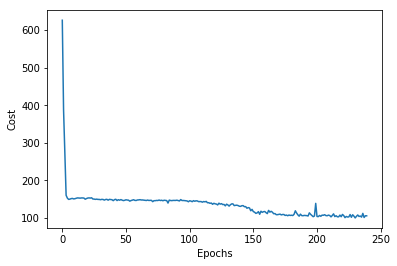

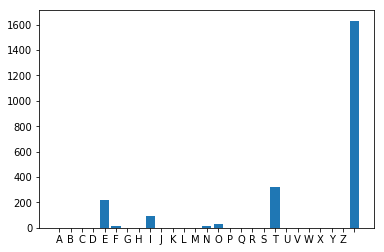

Cost:  104.9857421875
Cost:  103.55283203125
Cost:  100.47796020507812
Cost:  100.63824462890625
Cost:  103.056396484375
Cost:  107.59012451171876
Cost:  102.29973754882812
Cost:  100.96400756835938
Cost:  106.67698974609375
Cost:  102.15843505859375
Number of epochs: 250
250
250
250


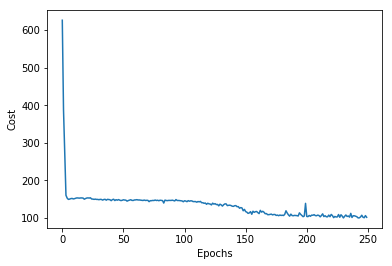

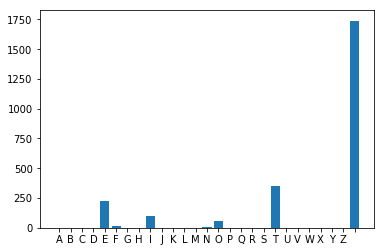

Cost:  107.7136474609375
Cost:  101.5390625
Cost:  102.72379150390626
Cost:  103.59342041015626
Cost:  109.0897216796875
Cost:  101.87107543945312
Cost:  100.64866943359375
Cost:  98.53811645507812
Cost:  102.33570556640625
Cost:  104.459912109375
Number of epochs: 260
260
260
260


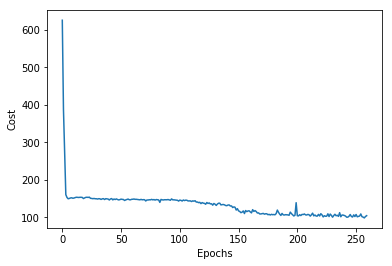

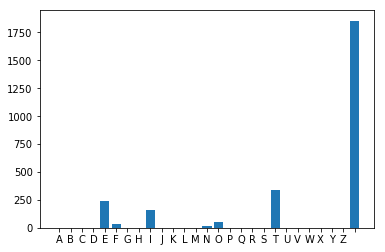

Cost:  109.346826171875
Cost:  101.27386474609375
Cost:  101.10159912109376
Cost:  102.1483642578125
Cost:  104.39254150390624
Cost:  97.64178466796875
Cost:  106.2135986328125
Cost:  103.6947509765625
Cost:  107.19271240234374
Cost:  98.81817016601562
Number of epochs: 270
270
270
270


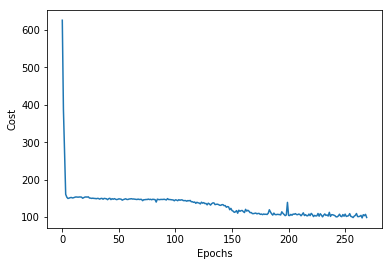

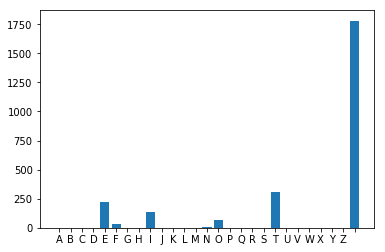

Cost:  97.8164794921875
Cost:  103.5912841796875
Cost:  103.576953125
Cost:  100.5564453125
Cost:  98.4994140625
Cost:  100.23668212890625
Cost:  98.37705078125
Cost:  101.07511596679687
Cost:  101.74298095703125
Cost:  98.2640625
Number of epochs: 280
280
280
280


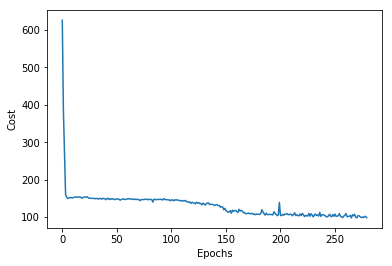

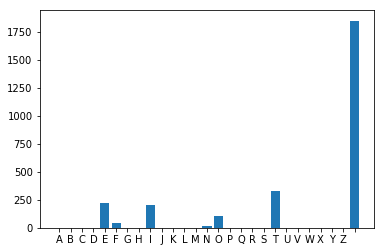

Cost:  103.23590087890625
Cost:  97.12261352539062
Cost:  102.93828125
Cost:  101.93911743164062
Cost:  109.0830810546875
Cost:  99.82825927734375
Cost:  99.81328735351562
Cost:  101.49800415039063
Cost:  95.60245361328126
Cost:  98.35109252929688
Number of epochs: 290
290
290
290


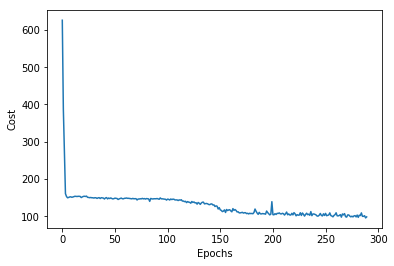

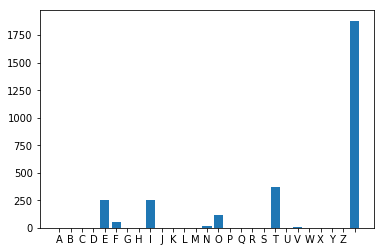

Cost:  103.5180419921875
Cost:  97.96132202148438
Cost:  103.36502685546876
Cost:  109.781298828125
Cost:  100.56683349609375
Cost:  100.13651733398437
Cost:  100.39172973632813
Cost:  100.72423706054687
Cost:  98.8649658203125
Cost:  98.5645751953125
Number of epochs: 300
300
300
300


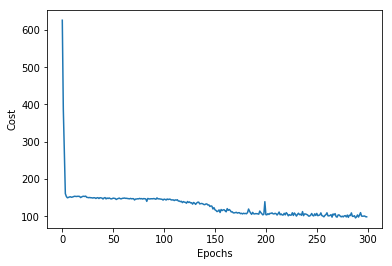

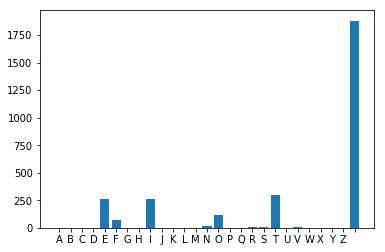

0
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ENTER TWO NINE EIGHT ONE
WER: 
inf
LER: 
{'LER': 23, 'WER': 23.0, 'Correct': 1, 'Sub': 0, 'Ins': 23, 'Del': 0}
1
torch.Size([1, 592, 28])
Predicted:  
Ground truth: REPEAT
WER: 
inf
LER: 
{'LER': 6, 'WER': 6.0, 'Correct': 0, 'Sub': 1, 'Ins': 5, 'Del': 0}
2
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ERASE U D B E FIVE
WER: 
inf
LER: 
{'LER': 17, 'WER': 17.0, 'Correct': 1, 'Sub': 0, 'Ins': 17, 'Del': 0}
3
torch.Size([1, 592, 28])
Predicted:  
Ground truth: RUBOUT U B U T R SIX
WER: 
inf
LER: 
{'LER': 19, 'WER': 19.0, 'Correct': 1, 'Sub': 0, 'Ins': 19, 'Del': 0}
4
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ENTER ONE OH FOUR
WER: 
inf
LER: 
{'LER': 16, 'WER': 16.0, 'Correct': 1, 'Sub': 0, 'Ins': 16, 'Del': 0}
5
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ERASE A B F N Q FIFTY SEVEN
WER: 
inf
LER: 
{'LER': 26, 'WER': 26.0, 'Correct': 1, 'Sub': 0, 'Ins': 26, 'Del': 0}
6
torch.Size([1, 592, 28])
Predicted:  
Groun

torch.Size([1, 592, 28])
Predicted:  
Ground truth: L E V I S O N
WER: 
inf
LER: 
{'LER': 12, 'WER': 12.0, 'Correct': 1, 'Sub': 0, 'Ins': 12, 'Del': 0}
59
torch.Size([1, 592, 28])
Predicted:  
Ground truth: G I N S B E R G
WER: 
inf
LER: 
{'LER': 14, 'WER': 14.0, 'Correct': 1, 'Sub': 0, 'Ins': 14, 'Del': 0}
60
torch.Size([1, 592, 28])
Predicted:   
Ground truth: C I N D Y
WER: 
inf
LER: 
{'LER': 7, 'WER': 3.5, 'Correct': 2, 'Sub': 0, 'Ins': 7, 'Del': 0}
61
torch.Size([1, 592, 28])
Predicted:  
Ground truth: J A N E T
WER: 
inf
LER: 
{'LER': 8, 'WER': 8.0, 'Correct': 1, 'Sub': 0, 'Ins': 8, 'Del': 0}
62
torch.Size([1, 592, 28])
Predicted:  
Ground truth: V A N E S S A
WER: 
inf
LER: 
{'LER': 12, 'WER': 12.0, 'Correct': 1, 'Sub': 0, 'Ins': 12, 'Del': 0}
63
torch.Size([1, 592, 28])
Predicted:  
Ground truth: A L A N
WER: 
inf
LER: 
{'LER': 6, 'WER': 6.0, 'Correct': 1, 'Sub': 0, 'Ins': 6, 'Del': 0}
64
torch.Size([1, 592, 28])
Predicted:  
Ground truth: D A V I D
WER: 
inf
LER: 
{'LER': 8, '

torch.Size([1, 592, 28])
Predicted:   
Ground truth: FOUR TWO ONE EIGHT EIGHT SIX OH
WER: 
inf
LER: 
{'LER': 29, 'WER': 14.5, 'Correct': 2, 'Sub': 0, 'Ins': 29, 'Del': 0}
116
torch.Size([1, 592, 28])
Predicted:  
Ground truth: TWO SIX EIGHT FOUR SIX NINE FOUR
WER: 
inf
LER: 
{'LER': 31, 'WER': 31.0, 'Correct': 1, 'Sub': 0, 'Ins': 31, 'Del': 0}
117
torch.Size([1, 592, 28])
Predicted:  
Ground truth: SIX EIGHT THREE THREE OH SEVEN FIVE
WER: 
inf
LER: 
{'LER': 34, 'WER': 34.0, 'Correct': 1, 'Sub': 0, 'Ins': 34, 'Del': 0}
118
torch.Size([1, 592, 28])
Predicted:  
Ground truth: EIGHT SIX TWO OH THREE EIGHT SEVEN
WER: 
inf
LER: 
{'LER': 33, 'WER': 33.0, 'Correct': 1, 'Sub': 0, 'Ins': 33, 'Del': 0}
119
torch.Size([1, 592, 28])
Predicted:   
Ground truth: FOUR ONE TWO TWO SIX EIGHT FOUR ONE FOUR TWO
WER: 
inf
LER: 
{'LER': 42, 'WER': 21.0, 'Correct': 2, 'Sub': 0, 'Ins': 42, 'Del': 0}
120
torch.Size([1, 592, 28])
Predicted:  
Ground truth: ELEVEN TWENTY SEVEN FIFTY SEVEN
WER: 
inf
LER: 
{'LER':

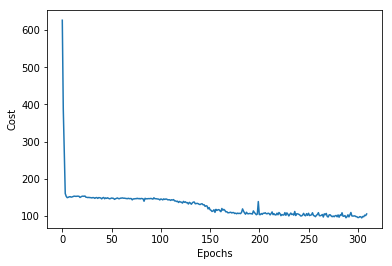

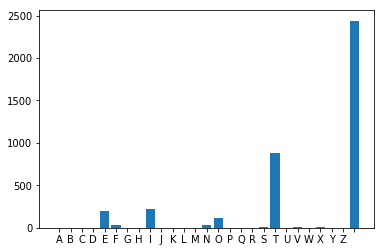

Cost:  100.03132934570313
Cost:  98.94817504882812
Cost:  101.35078125
Cost:  107.17476806640624
Cost:  96.00921020507812
Cost:  95.69138793945312
Cost:  98.6102294921875
Cost:  99.86585693359375
Cost:  96.79884643554688
Cost:  101.1699951171875
Number of epochs: 320
320
320
320


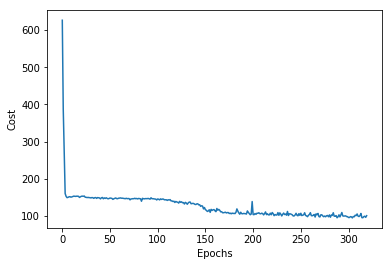

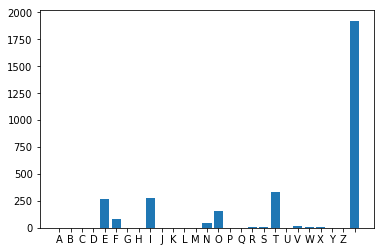

Cost:  100.50756225585937
Cost:  100.81350708007812
Cost:  96.65820922851563
Cost:  104.7106689453125
Cost:  96.76802978515624
Cost:  105.76048583984375
Cost:  99.93067016601563
Cost:  95.86742553710937
Cost:  95.84805908203126
Cost:  98.963037109375
Number of epochs: 330
330
330
330


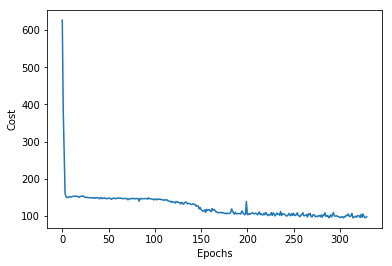

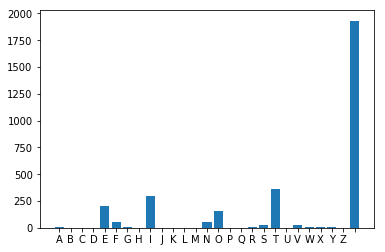

Cost:  95.87468872070312
Cost:  95.58076171875
Cost:  95.01947021484375
Cost:  101.47861328125
Cost:  98.31927490234375
Cost:  99.49448852539062
Cost:  96.848583984375
Cost:  92.7704833984375
Cost:  94.94418334960938
Cost:  98.86564331054687
Number of epochs: 340
340
340
340


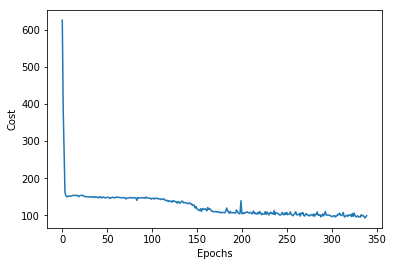

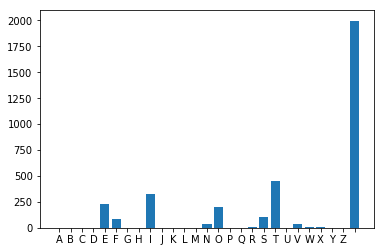

Cost:  95.8500732421875
Cost:  94.1294921875
Cost:  101.48131713867187
Cost:  98.73012084960938
Cost:  96.98987426757813
Cost:  94.93585815429688
Cost:  97.87833862304687
Cost:  99.45695190429687
Cost:  97.88460083007813
Cost:  102.89168701171874
Number of epochs: 350
350
350
350


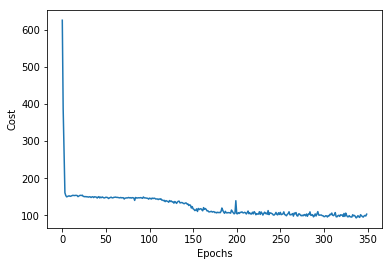

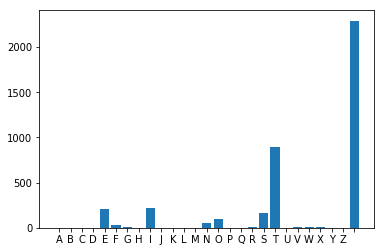

Cost:  99.99141845703124
Cost:  102.6964599609375
Cost:  97.81483154296875
Cost:  103.41219482421874
Cost:  101.152587890625
Cost:  96.56160888671874
Cost:  101.0170654296875
Cost:  101.59638671875
Cost:  103.71083984375
Cost:  98.47969970703124
Number of epochs: 360
360
360
360


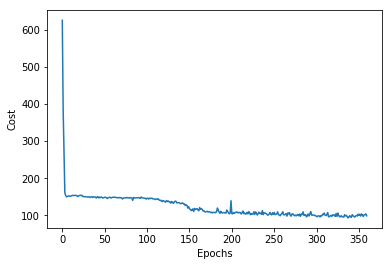

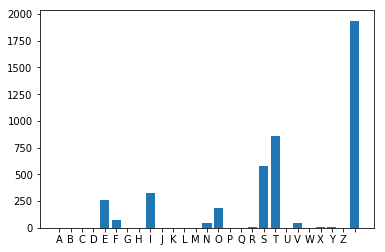

Cost:  98.17564697265625
Cost:  100.60485229492187
Cost:  97.6772705078125
Cost:  102.61165771484374
Cost:  93.8683837890625
Cost:  92.95859375
Cost:  95.20035400390626
Cost:  104.2888671875
Cost:  101.60419311523438
Cost:  99.1981201171875
Number of epochs: 370
370
370
370


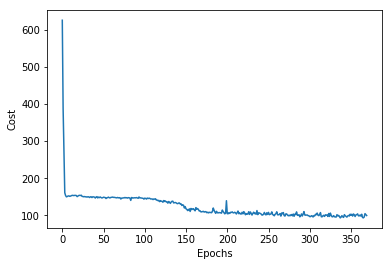

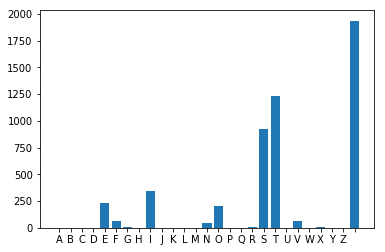

Cost:  95.66904296875
Cost:  101.49049072265625
Cost:  93.311376953125
Cost:  97.8405029296875
Cost:  97.2113525390625
Cost:  96.6087890625
Cost:  95.01098022460937
Cost:  95.36494140625
Cost:  95.60892333984376
Cost:  98.60193481445313
Number of epochs: 380
380
380
380


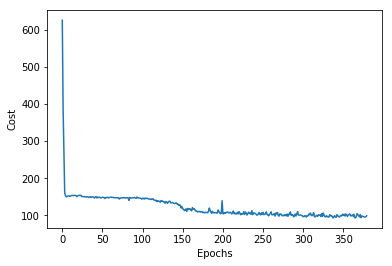

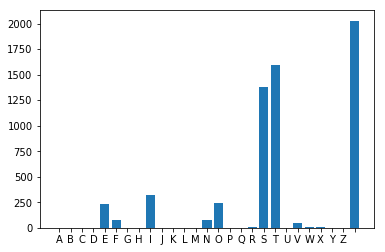

Cost:  98.248828125
Cost:  98.21027221679688
Cost:  110.69425048828126
Cost:  95.62537841796875
Cost:  102.8668212890625
Cost:  94.56559448242187
Cost:  93.52158203125
Cost:  98.78635864257812
Cost:  96.05538330078124
Cost:  95.63501586914063
Number of epochs: 390
390
390
390


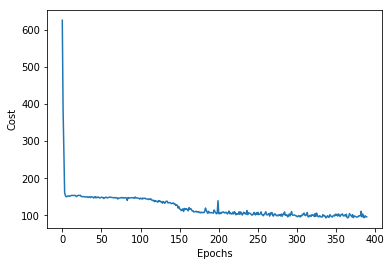

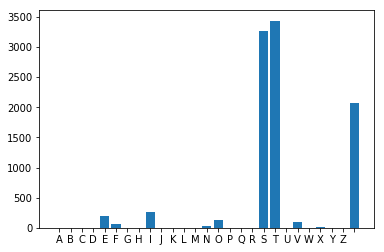

Cost:  94.8695068359375
Cost:  92.6177734375
Cost:  97.95306396484375
Cost:  96.33845825195313
Cost:  100.33553466796874
Cost:  99.468896484375


In [ ]:
counter = 0

torch.set_default_tensor_type('torch.FloatTensor')

hist_predicted = []

costs=[]
costs_eval=[]
num_evals=0 # or 0?
epoch=0

comparisons = []

for i in range(28):
    row = []
    for j in range(28):
        row.append(0)
    comparisons.append(row)

while epoch < num_epochs:
    hist_preds = [0]*27
    for i in range(int(num_samples/batch_size)):
        net.train()
        sample = np.empty([batch_size,400, 638])
        
        ground_truth_sizes = torch.empty(batch_size)
        probs_sizes = torch.empty(batch_size)
        
        ground_truth_string_int = []
        avg_cost=0
        for j in range(batch_size):
            samp = np.asarray(raw_wave_training_frames[i * batch_size + j].T, dtype=np.float32)
            sample[j] = samp
            
            string = ''.join(labels[i * batch_size + j])
           
            ground_truth_sizes[j] = len(string)
        
            for character in string:
                ground_truth_string_int.append(char_to_number[character])
        
        input_sample=torch.from_numpy(sample)
        

        ground_truth = torch.IntTensor(ground_truth_string_int)
        out = net(Variable(input_sample).float(), False)
        for j in range(batch_size):
            probs_sizes[j]=out.shape[1]
            
        for j, pred in enumerate(out): 
            if (epoch %100==0 and epoch > 0 and i == 0 and j == 0):
                print(''.join(greedy_decoder(torch.nn.functional.log_softmax(pred, dim=1), all_labels)))
                print_comparisons(matrix=comparisons)
            hist_preds = add_string_to_histogram(hist_preds, greedy_decoder(torch.nn.functional.log_softmax(pred, dim=1), all_labels))
            comparisons = prediction_comparator(comparisons, truth=''.join(labels[i*batch_size + j]),predicted=''.join(greedy_decoder(torch.nn.functional.log_softmax(pred, dim=1), all_labels)))

        #run the criterion
        optimizer.zero_grad()

       
        cost=criterion(out.transpose(0,1), torch.tensor(ground_truth_string_int).int(), probs_sizes.int(), ground_truth_sizes.int())
        cost.backward()
        optimizer.step()
        #print(cost)
        avg_cost = avg_cost+cost.item()/batch_size
        
    #print("average cost", avg_cost)
    avg_cost=avg_cost
    epoch = epoch + 1
    costs.append(avg_cost)
    print('Cost: ', avg_cost)
    
    #plots the average cost
    if(epoch%10 == 0 and epoch > 0):
        print("Number of epochs: "  + str(epoch))
        display_cost(costs, epoch)
        plot_histogram(hist_preds)
    error_rates=[]

    #evaluation not really implemented yet.    
    if(epoch%valid_epochs == 0 and epoch > 0):
        net.eval()
        avg_ler = 0
        avg_wer = 0
        with torch.no_grad():
            indices = [0]*batch_size
            
            #for j in range(batch_size):
            #    indices[j] = random.randint(0, len(labels_valid) - 1)
            #print(indices)
            
            for iteration, samp in enumerate(raw_wave_validatino_frames):
                sample = np.empty([1,400, 638])
                ground_truth_string_int = []
                ground_truth_sizes = torch.empty(1)
                probs_sizes = torch.empty(1)
                
                print(iteration)
                
                sample[0] = np.asarray(samp.T, dtype=np.float32)
                
                string = ''.join(labels_valid[iteration])
                ground_truth_sizes[0] = len(string)
                
                for character in string:
                       ground_truth_string_int.append(char_to_number[character])
                        
                outs, out = net(Variable(torch.from_numpy(sample).float()),True)
                probs_sizes[0]=out.shape[1]
               
                print(out.shape)

                ground_truth = ''.join(labels_valid[iteration])
                predicted = ''.join(greedy_decoder(out[0], all_labels))
                print("Predicted: " + predicted)
                print("Ground truth: " + ground_truth)
                wer = WER(predicted, ground_truth)
                ler = ler_extended(predicted, ground_truth)
                print("WER: ")
                print(wer)
                print("LER: ")
                print(ler)
                avg_wer = avg_wer + wer
                avg_ler = avg_ler + ler['LER']
            print("AVG WER: " + str(avg_wer/len(labels_valid)))
            print("AVG LER: " + str(avg_ler/len(labels_valid)))
            #ground_truth_string_int = []
            #ground_truth_sizes = torch.empty(1)
            #probs_sizes = torch.empty(batch_size)
            
            #vg_error_rate = 0
            #or j in range(batch_size):
            #   sample = np.empty([batch_size,400, 638])
            #   sample[j] = labels_valid[j].T
            #   
            #   string = ''.join(labels[i * batch_size + j])
            #   ground_truth_sizes[j] = len(string)
            #   
            #   for character in string:
            #       ground_truth_string_int.append(char_to_number[character])

            #   outs, out = net(Variable(torch.from_numpy(sample).float()),True)
            #   
            #   for j in range(batch_size):
            #       probs_sizes[j]=out.shape[1]
            #   for k, res in enumerate(outs):
            #       print(res.shape)
            #       plt.figure(figsize=(10, 4))
            #       librosa.display.specshow(res[0].detach().numpy(), x_axis='time', sr=16000)
            #       plt.colorbar()
            #       plt.title('conv_'+str(k+1))
            #       plt.tight_layout()
                
            #    print(out.shape)
                
            #    cost=criterion(out.transpose(0,1), torch.tensor(ground_truth_string_int).int(), probs_sizes.int(), ground_truth_sizes.int())
        
            #    costs_eval.append(cost/batch_size)
                
            #   for j in range(batch_size):
            #       ground_truth = ''.join(labels_valid[j])
            #       predicted = ''.join(greedy_decoder(out[j], all_labels))
            #       print("Predicted: " + predicted)
            #       print("Ground truth: " + ground_truth)
            #       ler = ler_extended(predicted, ground_truth)
            #       print("ler: ")
            #       print(ler)
            #       avg_error_rate = avg_error_rate + ler['Total absolute']
            
            #print("Eval loss: ")
            #display_cost_eval(costs_eval, epoch, valid_epochs)
                
            #num_evals += 1
            
            #avg_error_rate/batch_size
            #error_rates.append(avg_error_rate)
        